# Proximal Policy Optimization


In [4]:
# from google.colab import drive
# drive.mount("/RL")

# %cd ../RL/MyDrive/RL_PPO

Mounted at /RL
/RL/MyDrive/RL_PPO


In [ ]:
!pip install swig
!pip install gym[box2d]
!pip install "stable-baselines3[extra]>=2.0.0a4"

: 

In [8]:
import os
import gym
import torch
import numpy as np
import seaborn as sns
from ppo.ppo import PPO_ours
from ppo.utils import load_data_ours, load_data_baseline, add_plot_seed_avg, run_random_policy, calculate_ttest
import matplotlib.pyplot as plt
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.logger import configure
from stable_baselines3 import PPO

%load_ext autoreload
%autoreload 2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
seeds = [1, 42, 123]
for seed in seeds:
  env = gym.make('Pendulum-v1')
  ppo = PPO_ours(env, seed=seed, ipynb=True, name='pendulum', verbose='light', device=device, adv_norm=False, grad_clip=False, entropy_reg=False, lr_annealing=True)
  ppo.learn(1_000_000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

**************************************************
Starting training for pendulum (seed = 1)...
Running PPO for 1000000 timesteps...
Batch size: 4800
Max timesteps per episode: 1000.0
Expected Iterations: 209.0
**************************************************
Iteration 10/209
Iteration 20/209
Iteration 30/209
Iteration 40/209
Iteration 50/209
Iteration 60/209
Iteration 70/209
Iteration 80/209
Iteration 90/209
Iteration 100/209
Iteration 110/209
Iteration 120/209
Iteration 130/209
Iteration 140/209
Iteration 150/209
Iteration 160/209
Iteration 170/209
Iteration 180/209
Iteration 190/209
Iteration 200/209
**************************************************
Starting training for pendulum (seed = 42)...
Running PPO for 1000000 timesteps...
Batch size: 4800
Max timesteps per episode: 1000.0
Expected Iterations: 209.0
**************************************************
Iteration 10/209
Iteration 20/209
Iteration 30/209
Iteration 40/209
Iteration 50/209
Iteration 60/209
Iteration 70/209
Itera

In [ ]:
name = 'bipedalwalker'

path = f'./ppo/data/baseline_seed_data/{name}/'
seeds = [123]
envs = ['Pendulum-v1', 'MountainCarContinuous-v0', 'BipedalWalker-v3']
timesteps = [1_000_000, 1_000_000, 2_000_000]

env_ids = {
    'pendulum': 0,
    'mountaincar': 1,
    'bipedalwalker': 2
}


for seed in seeds:
    # hyperparameters = {'n_steps': 2048, 'gamma': 0.99, 'ent_coef': 0.0, 'learning_rate': 3e-4, 'verbose': 1, 'seed': seed}

    new_logger = configure(path, ["stdout", "log"])


    env = make_vec_env(envs[env_ids[name]], n_envs=1)
    model = PPO('MlpPolicy', env, seed=seed)
    model.set_logger(new_logger)
    model.learn(timesteps[env_ids[name]])

    os.rename(path + 'log.txt', path + f'seed_{seed}.txt')

Streaming output truncated to the last 5000 lines.
|    loss                 | 0.932       |
|    n_updates            | 7490        |
|    policy_gradient_loss | -0.0115     |
|    std                  | 0.314       |
|    value_loss           | 3.36        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 975         |
|    ep_rew_mean          | 231         |
| time/                   |             |
|    fps                  | 510         |
|    iterations           | 751         |
|    time_elapsed         | 3011        |
|    total_timesteps      | 1538048     |
| train/                  |             |
|    approx_kl            | 0.021342332 |
|    clip_fraction        | 0.194       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.01       |
|    explained_variance   | 0.859       |
|    learning_rate        | 0.0003      |
|    loss                

In [ ]:
seeds = [1, 42, 123]
for seed in seeds:
  env = gym.make('MountainCarContinuous-v0')
  ppo = PPO_ours(env, seed=seed, ipynb=True, name='mountaincar', verbose='light', device=device, adv_norm=False, grad_clip=False, entropy_reg=False, lr_annealing=True)
  ppo.learn(1_000_000)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


**************************************************
Starting training for mountaincar (seed = 1)...
Running PPO for 1000000 timesteps...
Batch size: 4800
Max timesteps per episode: 1000.0
Expected Iterations: 209.0
**************************************************
Iteration 5/209
Iteration 10/209
Iteration 15/209
Iteration 20/209
Iteration 25/209
Iteration 30/209
Iteration 35/209
Iteration 40/209
Iteration 45/209
Iteration 50/209
Iteration 55/209
Iteration 60/209
Iteration 65/209
Iteration 70/209
Iteration 75/209
Iteration 80/209
Iteration 85/209
Iteration 90/209
Iteration 95/209
Iteration 100/209
Iteration 105/209
Iteration 110/209
Iteration 115/209
Iteration 120/209
Iteration 125/209
Iteration 130/209
Iteration 135/209
Iteration 140/209
Iteration 145/209
Iteration 150/209
Iteration 155/209
Iteration 160/209
Iteration 165/209
Iteration 170/209
Iteration 175/209
Iteration 180/209
Iteration 185/209
Iteration 190/209
Iteration 195/209
**************************************************
St

In [ ]:
seeds = [1, 42, 123]

for seed in seeds:
  env = gym.make('BipedalWalker-v3')
  ppo = PPO_ours(env, seed=seed, ipynb=True, name='bipedalwalker', verbose='light', device=device, adv_norm=False, grad_clip=False, entropy_reg=False, lr_annealing=True)
  ppo.learn(2_000_000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

**************************************************
Starting training for bipedalwalker (seed = 42)...
Running PPO for 2000000 timesteps...
Batch size: 4800
Max timesteps per episode: 1000.0
Expected Iterations: 417.0
**************************************************
Iteration 10/417
Iteration 20/417
Iteration 30/417
Iteration 40/417
Iteration 50/417
Iteration 60/417
Iteration 70/417
Iteration 80/417
Iteration 90/417
Iteration 100/417
Iteration 110/417
Iteration 120/417
Iteration 130/417
Iteration 140/417
Iteration 150/417
Iteration 160/417
Iteration 170/417
Iteration 180/417
Iteration 190/417
Iteration 200/417
Iteration 210/417
Iteration 220/417
Iteration 230/417
Iteration 240/417
Iteration 250/417
Iteration 260/417
Iteration 270/417
Iteration 280/417
Iteration 290/417
Iteration 300/417
Iteration 310/417
Iteration 320/417
Iteration 330/417
Iteration 340/417
Iteration 350/417
Iteration 360/417
Iteration 370/417
Iteration 380/417
Iteration 390/417


In [ ]:
num_timesteps = [1_000_000, 1_000_000, 2_000_000]
batch_size = 4800
seeds = [1, 42, 123]

for seed in seeds:
    run_random_policy('Pendulum-v1', num_timesteps[0], batch_size, seed, name='pendulum')
    run_random_policy('MountainCarContinuous-v0', num_timesteps[1], batch_size, seed, name='mountaincar')
    run_random_policy('BipedalWalker-v3', num_timesteps[2], batch_size, seed, name='bipedalwalker')

In [9]:
# palette = ['#0072BD', '#D95319', '#EDB120', '#7E2F8E', '#77AC30', '#4DBEEE', '#A2142F']
palette = sns.color_palette("colorblind")
metric = 'mean'

pend_ours_basic = load_data_ours('./ppo/data/seed_data/pendulum/', key='basic')
pend_ours_norm = load_data_ours('./ppo/data/seed_data/pendulum/', key='n_alone')
pend_ours_gc = load_data_ours('./ppo/data/seed_data/pendulum/', key='gc_alone')
pend_ours_lr = load_data_ours('./ppo/data/seed_data/pendulum/', key='lr_alone')
pend_ours_full = load_data_ours('./ppo/data/seed_data/pendulum/', key='full')
pend_random = load_data_ours('./ppo/data/random_seed_data/pendulum/', key='', random=True)
pend_base = load_data_baseline('./ppo/data/baseline_seed_data/pendulum/')

mcar_ours_basic = load_data_ours('./ppo/data/seed_data/mountaincar/', key='basic')
mcar_ours_norm = load_data_ours('./ppo/data/seed_data/mountaincar/', key='n_alone')
mcar_ours_gc = load_data_ours('./ppo/data/seed_data/mountaincar/', key='gc_alone')
mcar_ours_lr = load_data_ours('./ppo/data/seed_data/mountaincar/', key='lr_alone')
mcar_random = load_data_ours('./ppo/data/random_seed_data/mountaincar/', key='', random=True)
mcar_base = load_data_baseline('./ppo/data/baseline_seed_data/mountaincar/')

bwalk_ours_basic = load_data_ours('./ppo/data/seed_data/bipedalwalker/', key='basic')
bwalk_ours_norm = load_data_ours('./ppo/data/seed_data/bipedalwalker/', key='n_alone')
bwalk_ours_gc = load_data_ours('./ppo/data/seed_data/bipedalwalker/', key='gc_alone')
bwalk_ours_lr = load_data_ours('./ppo/data/seed_data/bipedalwalker/', key='lr_alone')
bwalk_random = load_data_ours('./ppo/data/random_seed_data/bipedalwalker/', key='', random=True)
bwalk_base = load_data_baseline('./ppo/data/baseline_seed_data/bipedalwalker/')

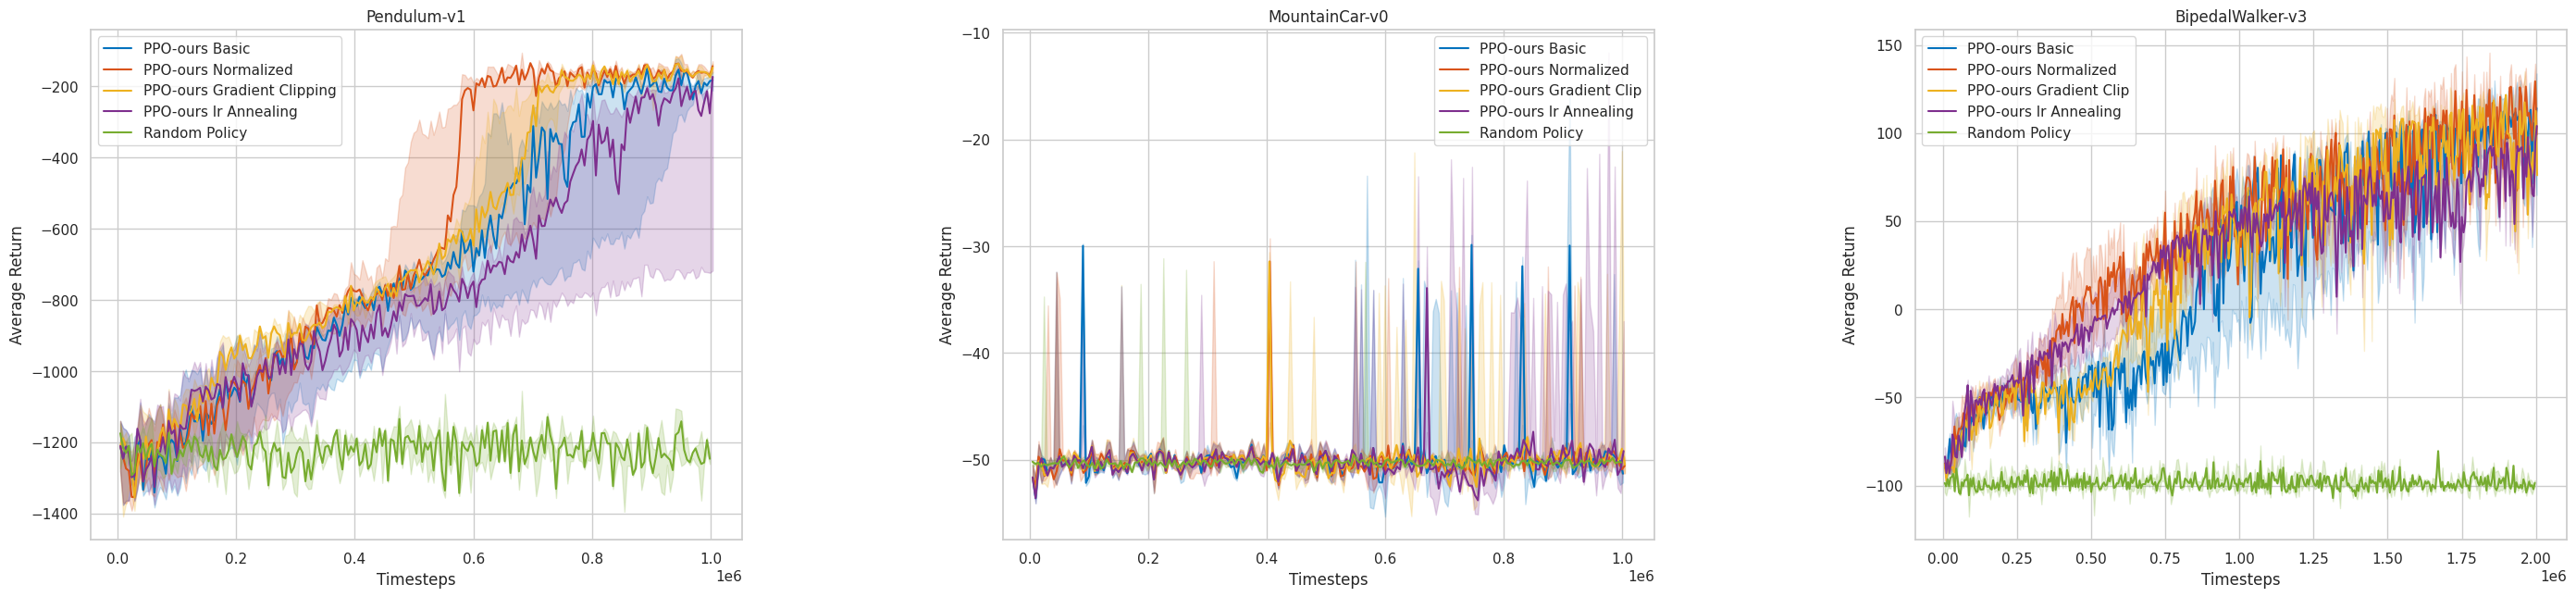

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(28, 7))
# plt.suptitle(f"Average Episodic Return with CI with {pend_ours_norm['avg_ep_ret'].shape[0]} random seeds", fontsize='x-large')

ax1 = plt.subplot(131)

add_plot_seed_avg(pend_ours_basic['avg_ep_ret'], pend_ours_basic['timesteps'].iloc[0], color=palette[0], label='PPO-ours Basic', metric=metric)
add_plot_seed_avg(pend_ours_norm['avg_ep_ret'], pend_ours_norm['timesteps'].iloc[0], color=palette[1], label='PPO-ours Normalized', metric=metric)
add_plot_seed_avg(pend_ours_gc['avg_ep_ret'], pend_ours_gc['timesteps'].iloc[0], color=palette[2], label='PPO-ours Gradient Clipping', metric=metric)
add_plot_seed_avg(pend_ours_lr['avg_ep_ret'], pend_ours_lr['timesteps'].iloc[0], color=palette[3], label='PPO-ours lr Annealing', metric=metric)
add_plot_seed_avg(pend_random['avg_ep_ret'], pend_random['timesteps'].iloc[0], color=palette[4], label='Random Policy', metric=metric)
ax1.set_title("Pendulum-v1", fontsize=18)
ax1.set_xlabel('Timesteps', fontsize=16)
ax1.set_ylabel('Average Return', fontsize=16)
ax1.legend()


ax2 = plt.subplot(132)

add_plot_seed_avg(mcar_ours_basic['avg_ep_ret'], mcar_ours_basic['timesteps'].iloc[0], color=palette[0], label='PPO-ours Basic', metric=metric)
add_plot_seed_avg(mcar_ours_norm['avg_ep_ret'], mcar_ours_norm['timesteps'].iloc[0], color=palette[1], label='PPO-ours Normalized', metric=metric)
add_plot_seed_avg(mcar_ours_gc['avg_ep_ret'], mcar_ours_gc['timesteps'].iloc[0], color=palette[2], label='PPO-ours Gradient Clip', metric=metric)
add_plot_seed_avg(mcar_ours_lr['avg_ep_ret'], mcar_ours_lr['timesteps'].iloc[0], color=palette[3], label='PPO-ours lr Annealing', metric=metric)
add_plot_seed_avg(mcar_random['avg_ep_ret'], mcar_random['timesteps'].iloc[0], color=palette[4], label='Random Policy', metric=metric)
ax2.set_title("MountainCarContinuous-v0", fontsize=18)
ax2.set_xlabel('Timesteps', fontsize=16)
ax2.set_ylabel('Average Return', fontsize=16)
ax2.legend()


ax3 = plt.subplot(133)

add_plot_seed_avg(bwalk_ours_basic['avg_ep_ret'], bwalk_ours_basic['timesteps'].iloc[0], color=palette[0], label='PPO-ours Basic', metric=metric)
add_plot_seed_avg(bwalk_ours_norm['avg_ep_ret'], bwalk_ours_norm['timesteps'].iloc[0], color=palette[1], label='PPO-ours Normalized', metric=metric)
add_plot_seed_avg(bwalk_ours_gc['avg_ep_ret'], bwalk_ours_gc['timesteps'].iloc[0], color=palette[2], label='PPO-ours Gradient Clip', metric=metric)
add_plot_seed_avg(bwalk_ours_lr['avg_ep_ret'], bwalk_ours_lr['timesteps'].iloc[0], color=palette[3], label='PPO-ours lr Annealing', metric=metric)
add_plot_seed_avg(bwalk_random['avg_ep_ret'], bwalk_random['timesteps'].iloc[0], color=palette[4], label='Random Policy', metric=metric)
ax3.set_title("BipedalWalker-v3", fontsize=18)
ax3.set_xlabel('Timesteps', fontsize=16)
ax3.set_ylabel('Average Return', fontsize=16)
ax3.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.975])
plt.subplots_adjust(wspace=0.4)
plt.savefig(f'./ppo/plots/general/avg_episodic_return_variants_{metric}.png')
plt.show()

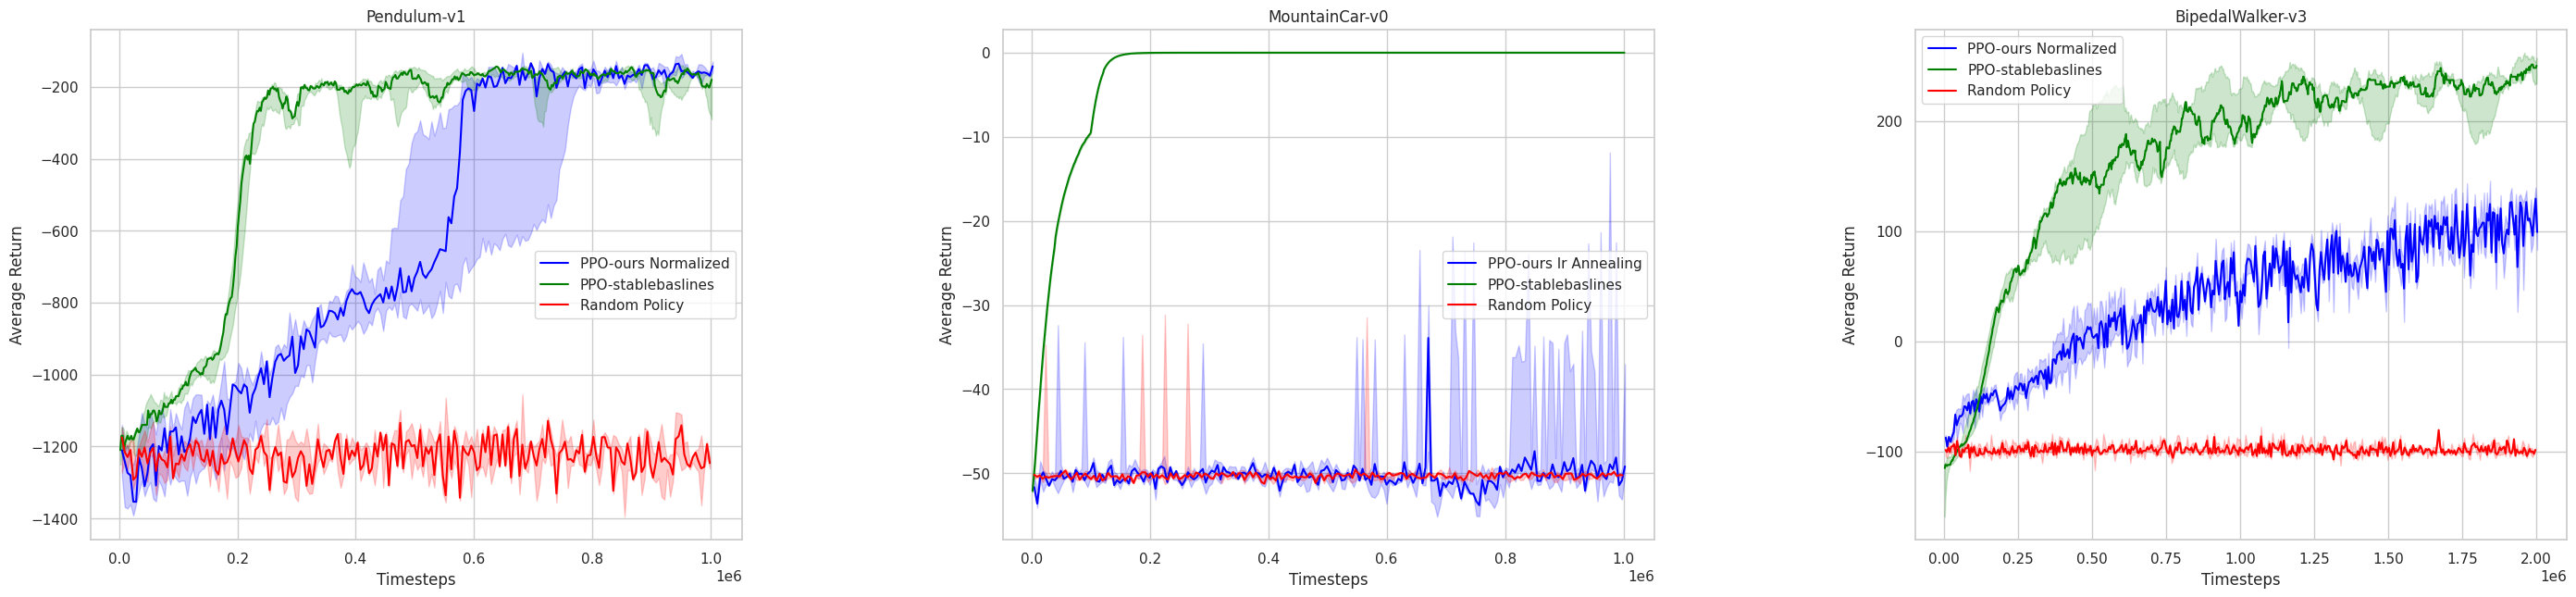

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(28, 7))
# plt.suptitle(f"Average Episodic Return with CI with {pend_ours_norm['avg_ep_ret'].shape[0]} random seeds", fontsize='x-large')

ax1 = plt.subplot(131)

add_plot_seed_avg(pend_ours_norm['avg_ep_ret'], pend_ours_norm['timesteps'].iloc[0], color='blue', label='PPO-ours Normalized', metric=metric)
add_plot_seed_avg(pend_base['avg_ep_ret'], pend_base['timesteps'].iloc[0], color='green', label='PPO-stablebaslines', metric=metric)
add_plot_seed_avg(pend_random['avg_ep_ret'], pend_random['timesteps'].iloc[0], color='red', label='Random Policy', metric=metric)
ax1.set_title("Pendulum-v1", fontsize=18)
ax1.set_xlabel('Timesteps', fontsize=16)
ax1.set_ylabel('Average Return', fontsize=16)
ax1.legend()


ax2 = plt.subplot(132)

add_plot_seed_avg(mcar_ours_lr['avg_ep_ret'], mcar_ours_lr['timesteps'].iloc[0], color='blue', label='PPO-ours lr Annealing', metric=metric)
add_plot_seed_avg(mcar_base['avg_ep_ret'], mcar_base['timesteps'].iloc[0], color='green', label='PPO-stablebaslines', metric=metric)
add_plot_seed_avg(mcar_random['avg_ep_ret'], mcar_random['timesteps'].iloc[0], color='red', label='Random Policy', metric=metric)
ax2.set_title("MountainCarContinuous-v0", fontsize=18)
ax2.set_xlabel('Timesteps', fontsize=16)
ax2.set_ylabel('Average Return', fontsize=16)
ax2.legend()


ax3 = plt.subplot(133)

add_plot_seed_avg(bwalk_ours_norm['avg_ep_ret'], bwalk_ours_norm['timesteps'].iloc[0], color='blue', label='PPO-ours Normalized', metric=metric)
add_plot_seed_avg(bwalk_base['avg_ep_ret'], bwalk_base['timesteps'].iloc[0], color='green', label='PPO-stablebaslines', metric=metric)
add_plot_seed_avg(bwalk_random['avg_ep_ret'], bwalk_random['timesteps'].iloc[0], color='red', label='Random Policy', metric=metric)
ax3.set_title("BipedalWalker-v3", fontsize=18)
ax3.set_xlabel('Timesteps', fontsize=16)
ax3.set_ylabel('Average Return', fontsize=16)
ax3.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.975])
plt.subplots_adjust(wspace=0.4)
plt.savefig(f'./ppo/plots/general/avg_episodic_return_baselines_{metric}.png')
plt.show()

In [ ]:
print("Comparing the basic PPO for Pendulum, with:")
print()
print("Normalized Advantage:")
calculate_ttest(pend_ours_basic['avg_ep_ret'], pend_ours_norm['avg_ep_ret'])
print()
print("Gradient Clipping:")
calculate_ttest(pend_ours_basic['avg_ep_ret'], pend_ours_gc['avg_ep_ret'])
print()
print("Learning Rate Annealing:")
calculate_ttest(pend_ours_basic['avg_ep_ret'], pend_ours_lr['avg_ep_ret'])
print()
print("Random Policy:")
calculate_ttest(pend_ours_basic['avg_ep_ret'], pend_random['avg_ep_ret'])
print()
print("Stable Baselines3:")
calculate_ttest(pend_ours_basic['avg_ep_ret'], pend_base['avg_ep_ret'])

Comparing the basic PPO for Pendulum, with:

Normalized Advantage:
T-statistic: -0.8611401963068738
P-value: 0.437720548965786

Gradient Clipping:
T-statistic: -1.124289255250877
P-value: 0.3237949799867427

Learning Rate Annealing:
T-statistic: 0.46282698185857674
P-value: 0.6675468629228667

Random Policy:
T-statistic: 4.8060349700915515
P-value: 0.008610163246942557

Stable Baselines3:
T-statistic: -3.879552349239177
P-value: 0.01784805719227341


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Comparing the basic PPO for MountainCar, with:")
print()
print("Normalized Advantage:")
calculate_ttest(mcar_ours_basic['avg_ep_ret'], mcar_ours_norm['avg_ep_ret'])
print()
print("Gradient Clipping:")
calculate_ttest(mcar_ours_basic['avg_ep_ret'], mcar_ours_gc['avg_ep_ret'])
print()
print("Learning Rate Annealing:")
calculate_ttest(mcar_ours_basic['avg_ep_ret'], mcar_ours_lr['avg_ep_ret'])
print()
print("Random Policy:")
calculate_ttest(mcar_ours_basic['avg_ep_ret'], mcar_random['avg_ep_ret'])
print()
print("Stable Baselines3:")
calculate_ttest(mcar_ours_basic['avg_ep_ret'], mcar_base['avg_ep_ret'])

Comparing the basic PPO for MountainCar, with:

Normalized Advantage:
T-statistic: 1.6673945278635744
P-value: 0.17076273021246827

Gradient Clipping:
T-statistic: -0.12128044251221627
P-value: 0.9093173316528516

Learning Rate Annealing:
T-statistic: -0.506289627949097
P-value: 0.6392836661803663

Random Policy:
T-statistic: 4.932459533926023
P-value: 0.007859009769650779

Stable Baselines3:
T-statistic: -394.3660330607222
P-value: 2.4804737005437483e-10


In [ ]:
print("Comparing the basic PPO for BipedalWalker, with:")
print()
print("Normalized Advantage:")
calculate_ttest(bwalk_ours_basic['avg_ep_ret'], bwalk_ours_norm['avg_ep_ret'])
print()
print("Gradient Clipping:")
calculate_ttest(bwalk_ours_basic['avg_ep_ret'], bwalk_ours_gc['avg_ep_ret'])
print()
print("Learning Rate Annealing:")
calculate_ttest(bwalk_ours_basic['avg_ep_ret'], bwalk_ours_lr['avg_ep_ret'])
print()
print("Random Policy:")
calculate_ttest(bwalk_ours_basic['avg_ep_ret'], bwalk_random['avg_ep_ret'])
print()
print("Stable Baselines3:")
calculate_ttest(bwalk_ours_basic['avg_ep_ret'], bwalk_base['avg_ep_ret'])

Comparing the basic PPO for BipedalWalker, with:

Normalized Advantage:
T-statistic: -1.2760266508700557
P-value: 0.29177468321386973

Gradient Clipping:
T-statistic: -0.5288649686034805
P-value: 0.6335302426482128

Learning Rate Annealing:
T-statistic: -0.5207103375724438
P-value: 0.6385590656119972

Random Policy:
T-statistic: 8.439203781150033
P-value: 0.0010798117310828268

Stable Baselines3:
T-statistic: -9.464603471342723
P-value: 0.0006951720610534134


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
